<a href="https://colab.research.google.com/github/ShashankK1/Btech-final-year-project/blob/main/allPollutantsPrediction_id1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 

In [ ]:
from pycaret.regression import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ProjectData/my3_1771976.csv')
var_arr = ['field5', 'field6']
tot_arr = ['field1', 'field2', 'field3', 'field4', 'field7', 'field8', 'entry_id']

In [ ]:
def manageFields(field, tot_arr1):
  temp_list = tot_arr1.copy()
  temp_list.remove(field)
  temp_df = df
  temp_df = temp_df.drop(temp_list,axis=1)
  temp_list = tot_arr1
  return temp_df

In [ ]:
df_no2 = manageFields('field1', tot_arr)
df_o3 = manageFields('field2', tot_arr)
df_so2 = manageFields('field3', tot_arr)
df_co = manageFields('field4', tot_arr)
df_pm2_5 = manageFields('field7', tot_arr)
df_pm10 = manageFields('field8', tot_arr)

In [ ]:
def removeGmt(df, field):
  df['created_at'] = df['created_at'].apply(lambda x:x.split('+')[0])
  df['created_at'] = pd.to_datetime(df['created_at'])
  df['created_at'] = df['created_at'].dt.round('min')
  field_ma = field+'_ma'
  df[field_ma] = df[field].rolling(window=5, center=False).mean()
  df = df.dropna()
  df = df[1::15]
  return df

In [ ]:
df_no2 = removeGmt(df_no2, 'field1');
df_o3 = removeGmt(df_o3, 'field2');
df_so2 = removeGmt(df_so2, 'field3');
df_co = removeGmt(df_co, 'field4');
df_pm2_5 = removeGmt(df_pm2_5, 'field7');
df_pm10 = removeGmt(df_pm10, 'field8');

In [ ]:
def createData(df, field):
  df = df.copy()
  df['Month'] = [i.month for i in df['created_at']]
  df['Day'] = [i.day for i in df['created_at']]
  df['Hour'] = [i.hour for i in df['created_at']]
  df['Minute'] = [i.minute for i in df['created_at']]
  df['year'] = [i.year for i in df['created_at']]
  df = df.sort_values(by=['year', 'Month', 'Day', 'Hour', 'Minute'])
  dat = df['created_at']
  df = df.drop(['created_at','year'], axis=1)
  field_ma = field + '_ma'
  df = df[['Month','Day','Hour', 'Minute', 'field5', 'field6', f"{field}", f"{field_ma}"]]
  return [df, dat]

In [ ]:
def createChart(predictions, field_ma, title):
  temp_df = predictions.rename({field_ma:'Actual', 'prediction_label': 'Predicted'}, axis=1, inplace=False)
  fig1 = px.line(temp_df, x='Date', y=['Actual', 'Predicted']).update_layout({'paper_bgcolor':'rgba(0,0,0,0)'},xaxis_title="Date and time", yaxis_title=title)

  fig1.show()

In [ ]:
[df_no2, dat] = createData(df_no2, 'field1')
[df_o3, dat] = createData(df_o3, 'field2')
[df_so2, dat] = createData(df_so2, 'field3')
[df_co, dat] = createData(df_co, 'field4')
[df_pm2_5, dat] = createData(df_pm2_5, 'field7')
[df_pm10, dat] = createData(df_pm10, 'field8')

In [ ]:
def train_test_split(df):
  train_data = train_data = df[0: int(len(df)*0.9964)]
  test_data = df[len(train_data): len(df)]
  return [train_data, test_data]

In [ ]:
[train_no2, test_no2] = train_test_split(df_no2)
[train_o3, test_o3] = train_test_split(df_o3)
[train_so2, test_so2] = train_test_split(df_so2)
[train_co, test_co] = train_test_split(df_co)
[train_pm2_5, test_pm2_5] = train_test_split(df_pm2_5)
[train_pm10, test_pm10] = train_test_split(df_pm10)
# test_no2 = test_no2.iloc[1:,:]
# test_o3 = test_o3.iloc[1:,:]
# test_so2 = test_so2.iloc[1:,:]
# test_co = test_co.iloc[1:,:]
# test_pm2_5 = test_pm2_5.iloc[1:,:]
# test_pm10 = test_pm10.iloc[1:,:]

In [ ]:
def createPredictions(model, test_data, dat):
  prediction_holdout = predict_model(model)
  predictions = predict_model(model, data=test_data)
  predictions['Date'] = dat
  return predictions

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
def plot_predictions1(model, test_data, field, ylabels, start=0, end=672):
  # predictions = (model.predict(X).flatten())*sd+mu
  predictions2 = createPredictions(model, test_data, dat)
  predictions = (predictions2['prediction_label'])
  y = test_data[field]
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.rcParams.update({'font.size': 20})
  plt.figure(figsize=(10, 4))
  plt.plot(predictions2['Date'],df['Predictions'][start:end], label='Predicted')
  plt.plot(predictions2['Date'],df['Actuals'][start:end], label='Actual')
  plt.xlabel('Time')
  plt.ylabel(ylabels)
  plt.legend()
  plt.grid(False)
  # plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
  plt.show()
# predictions = predict_model(model, data=test_data)
# col = list(temp_df)[0]
# mu1 = temp_df[col].mean()
# sd1 = temp_df[col].std()

,Description,Value
0,Session id,123
1,Target,field1_ma
2,Target type,Regression
3,Original data shape,"(70802, 8)"
4,Transformed data shape,"(70802, 8)"
5,Transformed train set shape,"(70547, 8)"
6,Transformed test set shape,"(255, 8)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,244.6770,245784.4393,495.7665,-0.2231,1.3127,0.5884
1,93.9932,18116.9425,134.5992,0.9190,0.3981,0.1603
2,11.4306,352.1687,18.7662,0.6389,0.0728,0.0477
Mean,116.7003,88084.5168,216.3773,0.4449,0.5945,0.2654
Std,96.5667,111746.2779,203.1388,0.4860,0.5249,0.2329


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,267.6463,265195.1935,514.9711,-0.3196,1.5789,0.6653
1,203.3788,72245.8153,268.7858,0.6768,0.4993,0.3010
2,19.6455,536.3586,23.1594,0.4500,0.0898,0.0815
Mean,163.5569,112659.1225,268.9721,0.2690,0.7226,0.3493
Std,105.0887,111761.6549,200.7813,0.4264,0.6281,0.2408


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,379.2048,144043.8981,379.5312,-36022283.8056,3.5827,38.5446


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,379.2048,144043.8981,379.5312,-36022283.8056,3.5827,38.5446


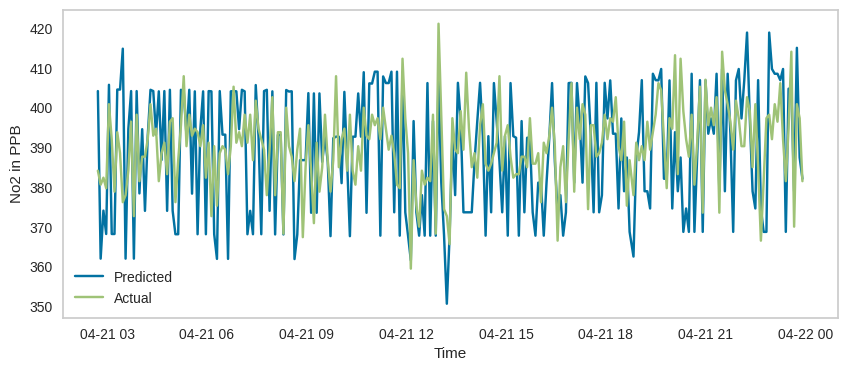

In [ ]:
def makeSetup(train_data, test_data, field):
  field_ma = field+'_ma'
  s = setup(data=train_data, target=field_ma,test_data=test_data,
                        fold_strategy = 'timeseries', numeric_features = ['Month','Day','Hour','Minute','field5','field6'], 
                        fold = 3, transform_target = True, session_id = 123)
  return s

s_no2 = makeSetup(train_no2, test_no2, 'field1')
no2_gbr = create_model('lightgbm')
tuned_gbr = tune_model(no2_gbr)
save_model(tuned_gbr, '/content/drive/MyDrive/Model/ID1/no2_model')
model = load_model('/content/drive/MyDrive/Model/ID1/no2_model')
mu = train_no2['field1_ma'].mean()
sd = train_no2['field1_ma'].std()
# def plot_predictions1(model, test_data, mu, sd, ylabels, start=0, end=672):
p = plot_predictions1(model, test_no2,'field1_ma', 'No2 in PPB')


# O3 Model

,Description,Value
0,Session id,123
1,Target,field2_ma
2,Target type,Regression
3,Original data shape,"(70802, 8)"
4,Transformed data shape,"(70802, 8)"
5,Transformed train set shape,"(70547, 8)"
6,Transformed test set shape,"(255, 8)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,133.9027,80659.9032,284.0069,-0.1987,1.3208,0.6621
1,50.1497,5241.4898,72.3981,0.9193,0.2045,0.1358
2,3.3436,21.0775,4.5910,0.9431,0.0344,0.0249
Mean,62.4653,28640.8235,120.3320,0.5546,0.5199,0.2742
Std,54.0073,36844.7343,119.0001,0.5327,0.5706,0.2780


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,143.1608,85052.3762,291.6374,-0.2640,1.5169,0.6803
1,188.9091,59379.2218,243.6785,0.0855,0.9116,0.4946
2,4.5910,38.5582,6.2095,0.8959,0.0435,0.0332
Mean,112.2203,48156.7187,180.5085,0.2391,0.8240,0.4027
Std,78.3636,35602.3945,124.7935,0.4858,0.6047,0.2720


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,215.8121,46583.4130,215.8319,-84211012.3516,3.1209,24.0852


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,215.8121,46583.4130,215.8319,-84211012.3516,3.1209,24.0852


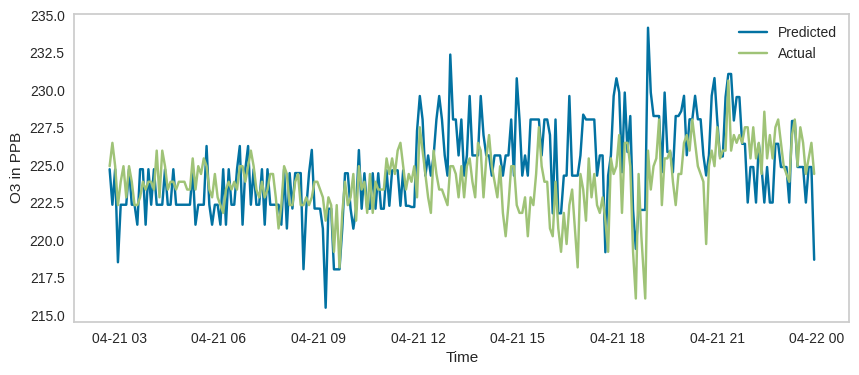

In [ ]:
def makeSetup(train_data, test_data, field):
  field_ma = field+'_ma'
  s = setup(data=train_data, target=field_ma,test_data=test_data,
                        fold_strategy = 'timeseries', numeric_features = ['Month','Day','Hour','Minute','field5','field6'], 
                        fold = 3, transform_target = True, session_id = 123)
  return s

s_o3 = makeSetup(train_o3, test_o3, 'field2')

o3_lgbm = create_model('lightgbm')
tuned_lgbm = tune_model(o3_lgbm)
save_model(tuned_lgbm, '/content/drive/MyDrive/Model/ID1/o3_model')

no2_model = load_model('/content/drive/MyDrive/Model/ID1/o3_model')
def createPredictions(model, test_data, dat):
  prediction_holdout = predict_model(model)
  predictions = predict_model(model, data=test_data)
  predictions['Date'] = dat
  return predictions

# o3_predictions = createPredictions(tuned_lgbm, test_o3, dat)
# createChart(o3_predictions, 'field2_ma', 'O3')
p = plot_predictions1(no2_model, test_o3, 'field2_ma', 'O3 in PPB')

#SO2 Model

,Description,Value
0,Session id,123
1,Target,field3_ma
2,Target type,Regression
3,Original data shape,"(70802, 8)"
4,Transformed data shape,"(70802, 8)"
5,Transformed train set shape,"(70547, 8)"
6,Transformed test set shape,"(255, 8)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,109.8127,77035.6502,277.5530,0.7081,0.3987,0.0876
1,22.7350,2234.7319,47.2730,0.9887,0.0604,0.0192
2,8.1405,107.1429,10.3510,0.9897,0.0154,0.0121
Mean,46.8961,26459.1750,111.7256,0.8955,0.1582,0.0396
Std,44.8860,35773.5148,118.2225,0.1325,0.1711,0.0340


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,298.9173,295049.8769,543.1849,-0.1179,0.6405,0.2695
1,95.4461,21076.3595,145.1770,0.8936,0.1103,0.0666
2,11.7141,211.0158,14.5264,0.9796,0.0220,0.0176
Mean,135.3591,105445.7507,234.2961,0.5851,0.2576,0.1179
Std,120.5991,134340.6966,224.8357,0.4984,0.2731,0.1090


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,819.1389,682498.7930,826.1349,-3389791.2095,4.0544,61.1161


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,819.1389,682498.7930,826.1349,-3389791.2095,4.0544,61.1161


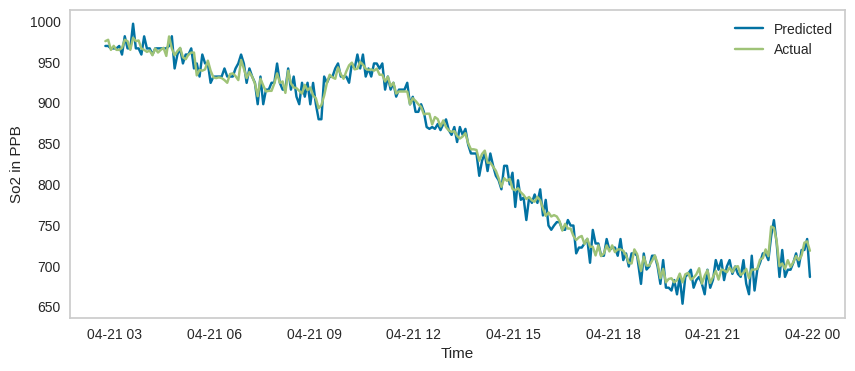

In [ ]:
def makeSetup(train_data, test_data, field):
  field_ma = field+'_ma'
  s = setup(data=train_data, target=field_ma,test_data=test_data,
                        fold_strategy = 'timeseries', numeric_features = ['Month','Day','Hour','Minute','field5','field6'], 
                        fold = 3, transform_target = True, session_id = 123)
  return s

s_so2 = makeSetup(train_so2, test_so2, 'field3')

so2_lgbm = create_model('lightgbm')
tuned_lgbm = tune_model(so2_lgbm)
save_model(tuned_lgbm, '/content/drive/MyDrive/Model/ID1/so2_model')
load_model('/content/drive/MyDrive/Model/ID1/so2_model')
# def createPredictions(model, test_data, dat):
#   prediction_holdout = predict_model(model)
#   predictions = predict_model(model, data=test_data)
#   predictions['Date'] = dat
#   return predictions

# so2_predictions = createPredictions(tuned_lgbm, test_so2, dat)
# createChart(so2_predictions, 'field3_ma', 'SO2')
p = plot_predictions1(tuned_lgbm, test_so2, 'field3_ma', 'So2 in PPB')

# CO Model

,Description,Value
0,Session id,123
1,Target,field4_ma
2,Target type,Regression
3,Original data shape,"(70802, 8)"
4,Transformed data shape,"(70802, 8)"
5,Transformed train set shape,"(70547, 8)"
6,Transformed test set shape,"(255, 8)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,161.4469,148541.7818,385.4112,0.1319,0.9675,0.3802
1,22.5355,1674.2063,40.9171,0.9883,0.1738,0.0352
2,6.4838,68.2751,8.2629,0.9754,0.0321,0.0250
Mean,63.4888,50094.7544,144.8637,0.6985,0.3911,0.1468
Std,69.5762,69615.6479,170.6144,0.4007,0.4116,0.1651


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,482.4367,232933.9690,482.6323,-35060409.5408,3.5937,38.1753


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,482.4367,232933.9690,482.6323,-35060409.5408,3.5937,38.1753


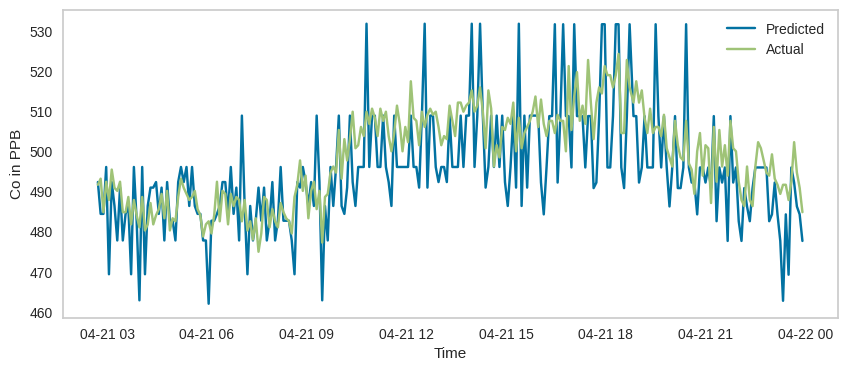

In [ ]:
def makeSetup(train_data, test_data, field):
  field_ma = field+'_ma'
  s = setup(data=train_data, target=field_ma,test_data=test_data,
                        fold_strategy = 'timeseries', numeric_features = ['Month','Day','Hour','Minute','field5','field6'], 
                        fold = 3, transform_target = True, session_id = 123)
  return s

s_co = makeSetup(train_co, test_co, 'field4')

co_rf = create_model('lightgbm')
save_model(co_rf, '/content/drive/MyDrive/Model/ID1/co_model')
load_model('/content/drive/MyDrive/Model/ID1/co_model')

def createPredictions(model, test_data, dat):
  prediction_holdout = predict_model(model)
  predictions = predict_model(model, data=test_data)
  predictions['Date'] = dat
  return predictions

# co_predictions = createPredictions(co_rf, test_co, dat)
# createChart(co_predictions, 'field4_ma', 'CO')
p = plot_predictions1(co_rf, test_co, 'field4_ma', 'Co in PPB')

#PM2.5 Model

,Description,Value
0,Session id,123
1,Target,field7_ma
2,Target type,Regression
3,Original data shape,"(70658, 8)"
4,Transformed data shape,"(70658, 8)"
5,Transformed train set shape,"(70403, 8)"
6,Transformed test set shape,"(255, 8)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.7217,13.8787,3.7254,0.9395,0.3010,0.3031
1,1.3894,3.3065,1.8184,0.9592,0.1261,0.1101
2,1.6109,4.7679,2.1836,0.9671,0.0953,0.0752
Mean,1.5740,7.3177,2.5758,0.9553,0.1742,0.1628
Std,0.1381,4.6775,0.8265,0.0116,0.0906,0.1002


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9497,29.4084,5.4230,0.8718,0.3310,0.3282
1,1.5970,4.5448,2.1319,0.9439,0.1343,0.1186
2,2.0595,6.7838,2.6046,0.9532,0.1052,0.0870
Mean,1.8687,13.5790,3.3865,0.9230,0.1902,0.1779
Std,0.1973,11.2303,1.4529,0.0364,0.1003,0.1071


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,28.6595,871.7996,29.5263,-2918.1532,1.6389,4.8863


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,28.6595,871.7996,29.5263,-2918.1532,1.6389,4.8863


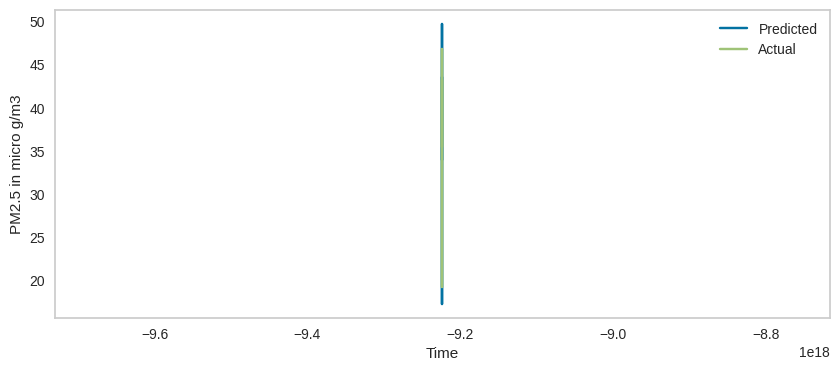

In [ ]:
def makeSetup(train_data, test_data, field):
  field_ma = field+'_ma'
  s = setup(data=train_data, target=field_ma,test_data=test_data,
                        fold_strategy = 'timeseries', numeric_features = ['Month','Day','Hour','Minute','field5','field6'], 
                        fold = 3, transform_target = True, session_id = 123)
  return s

s_pm2_5 = makeSetup(train_pm2_5, test_pm2_5, 'field7')

pm2_5_lgbm = create_model('lightgbm')
tuned_lgbm = tune_model(pm2_5_lgbm)
save_model(tuned_lgbm, '/content/drive/MyDrive/Model/ID1/pm2.5_model')
load_model('/content/drive/MyDrive/Model/ID1/pm2.5_model')

def createPredictions(model, test_data, dat):
  prediction_holdout = predict_model(model)
  predictions = predict_model(model, data=test_data)
  predictions['Date'] = dat
  return predictions

# pm2_5_predictions = createPredictions(tuned_lgbm, test_pm2_5, dat)
# createChart(pm2_5_predictions, 'field7_ma', 'PM2.5')
p = plot_predictions1(tuned_lgbm, test_pm2_5, 'field7_ma', 'PM2.5 in micro g/m3')

#PM10 Model

,Description,Value
0,Session id,123
1,Target,field8_ma
2,Target type,Regression
3,Original data shape,"(70802, 8)"
4,Transformed data shape,"(70802, 8)"
5,Transformed train set shape,"(70547, 8)"
6,Transformed test set shape,"(255, 8)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0166,10.4134,3.2270,0.9653,0.3314,0.3243
1,1.7107,4.9954,2.2350,0.9537,0.1410,0.1231
2,2.3342,9.0215,3.0036,0.9596,0.1131,0.0917
Mean,2.0205,8.1434,2.8219,0.9596,0.1952,0.1797
Std,0.2546,2.2974,0.4249,0.0047,0.0970,0.1030


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.2457,31.7785,5.6372,0.8942,0.3479,0.3303
1,1.9922,7.1568,2.6752,0.9337,0.1508,0.1318
2,2.7507,12.4226,3.5246,0.9444,0.1206,0.1002
Mean,2.3295,17.1193,3.9457,0.9241,0.2064,0.1874
Std,0.3153,10.5862,1.2454,0.0216,0.1008,0.1018


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,34.7913,1321.0730,36.3466,-3971.1042,1.8438,6.3654


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,34.7913,1321.0730,36.3466,-3971.1042,1.8438,6.3654


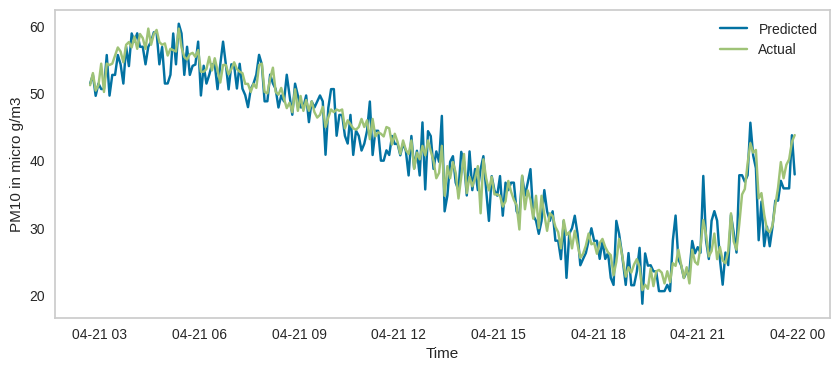

In [ ]:
def makeSetup(train_data, test_data, field):
  field_ma = field+'_ma'
  s = setup(data=train_data, target=field_ma,test_data=test_data,
                        fold_strategy = 'timeseries', numeric_features = ['Month','Day','Hour','Minute','field5','field6'], 
                        fold = 3, transform_target = True, session_id = 123)
  return s

s_pm10 = makeSetup(train_pm10, test_pm10, 'field8')

pm10_lgbm = create_model('lightgbm')
tuned_lgbm = tune_model(pm10_lgbm)
save_model(tuned_lgbm, '/content/drive/MyDrive/Model/ID1/pm10_model')
load_model('/content/drive/MyDrive/Model/ID1/pm10_model')

def createPredictions(model, test_data, dat):
  prediction_holdout = predict_model(model)
  predictions = predict_model(model, data=test_data)
  predictions['Date'] = dat
  return predictions
p = plot_predictions1(tuned_lgbm, test_pm10, 'field8_ma', 'PM10 in micro g/m3')
# pm10_predictions = createPredictions(tuned_lgbm, test_pm10, dat)
# createChart(pm10_predictions, 'field8_ma', 'PM10')